In [15]:
from qiskit import *
import numpy as np
from numpy import pi
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

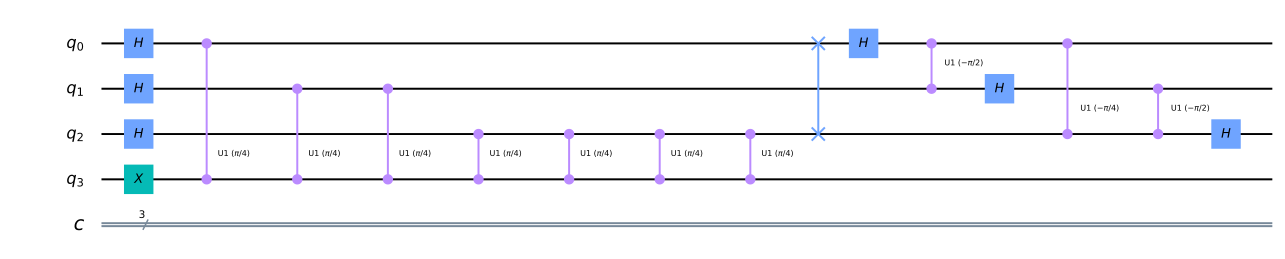

In [16]:
qc=QuantumCircuit(4,3)
qc.x(3)
for i in range(3):
    qc.h(i)
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qc.cu1(pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2
for i in range(1):
        qc.swap(i,(2-i))
for j in range(3):
        for m in range(j):
            qc.cu1(-pi/float(2**(j-m)), m, j)
        qc.h(j)
qc.draw('mpl')


In [17]:
for n in range(3):
    qc.measure(n,n)

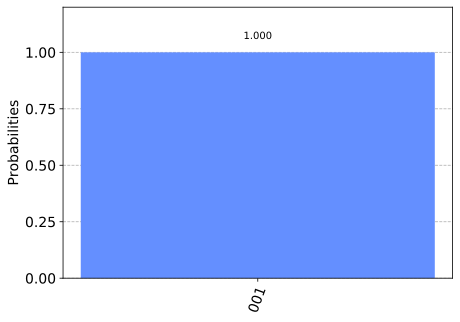

In [18]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(qc,backend=simulator).result()
counts=result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [19]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_16_melbourne')
job=execute(qc,backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

ibmqfactory.load_account:WARNING:2020-06-06 11:50:20,986: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


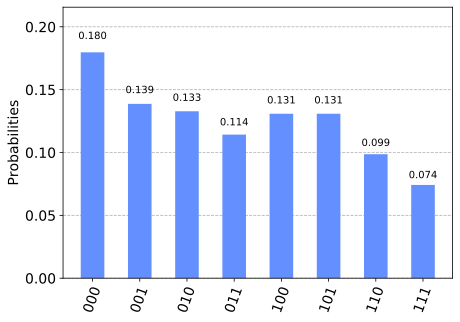

In [21]:
result=job.result()
plot_histogram(result.get_counts(qc))

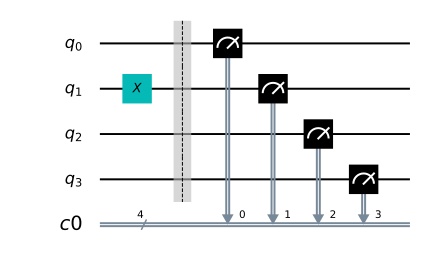

In [22]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels=complete_meas_cal(qr=qc.qregs[0],circlabel='measerromitigationcal')
cal_circuits[2].draw(output='mpl')

In [23]:
len(cal_circuits)

16

In [24]:
cal_job=execute(cal_circuits,
                backend=qcomp,
                shots=1024,
                optimization_level=0
               )
print(cal_job.job_id())
job_monitor(cal_job)
cal_results=cal_job.result()
            

5edb37c43729e900137d5683
Job Status: job has successfully run


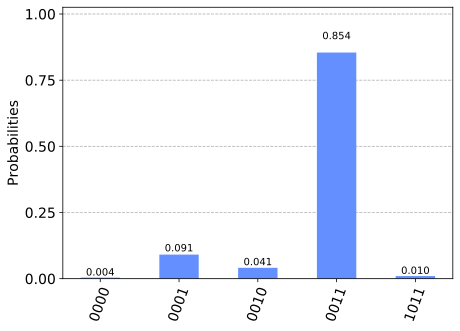

In [25]:
plot_histogram(
cal_results.get_counts(cal_circuits[3]))

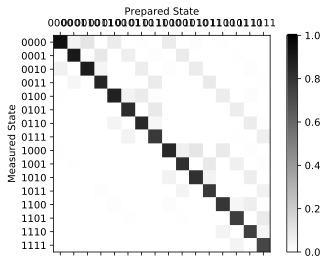

In [26]:
meas_fitter=CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()